In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib as mpl
import seaborn as sns

In [89]:
## 한글설정
path = 'C:/Users/jaemi/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'

font_name = font_manager.FontProperties(fname= path).get_name()
rc('font', family = font_name)

## 마이너스
mpl.rcParams['axes.unicode_minus']= False

In [90]:
df_test = pd.read_excel('./05000266/part4/b900357814d2f7af.xlsx',
                   header= 0, sheet_name= '데이터_2')

df_test = df_test.fillna(method= 'ffill')
df_test
# df_test.shape
mask = df_test['전력량 (억㎾h)'] == '남한'

df_test[mask]

,전력량 (억㎾h),발전 전력별,1990,1991,1992
0,남한,합계,1077,1186,1310
1,남한,수력,64,51,49
2,남한,화력,484,573,696
3,남한,원자력,529,563,565
4,남한,신재생,-,-,-


In [91]:
df = pd.read_excel('./05000266/part4/시도별 전출입 인구수.xlsx',
                   header= 0)
df = df.fillna(method= 'ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.head()
df_seoul2 = df_seoul.drop('전출지별', axis= 1)
df_seoul2.head()
df_seoul3 = df_seoul2.rename({'전입지별':'전입지'}, axis= 1)
df_seoul3.head()
df_seoul3.set_index('전입지', inplace= True)
df_seoul3.head()



,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


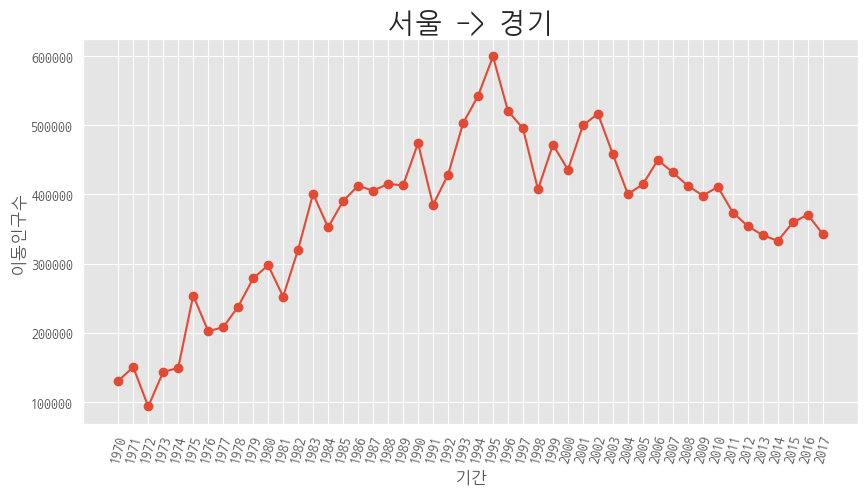

In [92]:
sr_one = df_seoul3.loc['경기도', :]
sr_one

plt.style.use('ggplot')

plt.figure(figsize= (10,5))
plt.plot(sr_one.index, sr_one.values, marker = 'o')

plt.title('서울 -> 경기', size = 20)
plt.xlabel('기간')
plt.ylabel('이동인구수')
plt.xticks(rotation = 75)
plt.show()


In [93]:
df_seoul3.head()
df_seoul3.columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

C:\Users\jaemi\AppData\Local\Temp\ipykernel_2328\3351082278.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(sr_one.index, rotation = 90)
C:\Users\jaemi\AppData\Local\Temp\ipykernel_2328\3351082278.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(sr_one.index, rotation = 90)


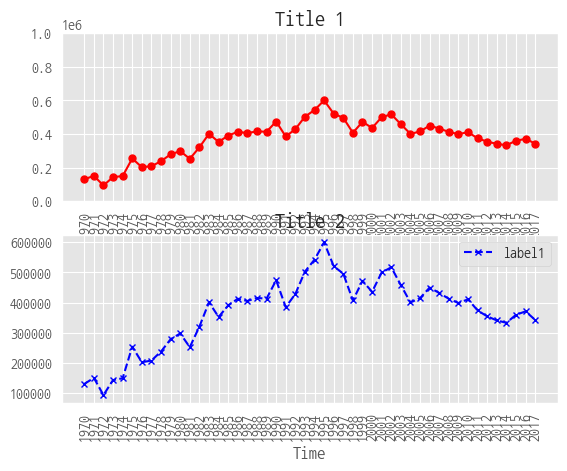

In [94]:
# print(sr_one)

fig, ax = plt.subplots(2, 1)    # fig : 전체, ax : 쪼개진

ax[0].plot(sr_one, 'ro-', markersize = 5)
ax[1].plot(sr_one, 'bx--', markersize = 5, label = 'label1')

ax[0].set_ylim(0, 1000000)

ax[0].set_title('Title 1')
ax[1].set_title('Title 2')

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

ax[0].set_xticklabels(sr_one.index, rotation = 90)
ax[1].set_xticklabels(sr_one.index, rotation = 90)

# plt.xticks(rotation = 90)


ax[1].legend()
plt.show()

In [95]:
df_3 = df_seoul3.loc[['충청남도', '경상북도', '강원도']]
df_3



,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


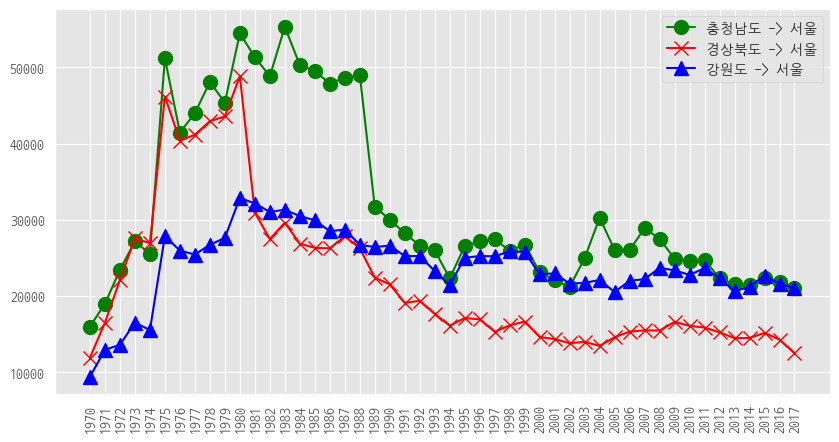

In [96]:
plt.figure(figsize= (10,5))
plt.plot(df_seoul3.columns, df_seoul3.loc['충청남도'],marker = 'o', markersize = 10, color = 'g', label = '충청남도 -> 서울')
plt.plot(df_seoul3.columns, df_seoul3.loc['경상북도'],
         marker = 'x', markersize = 10, color = 'r', label = '경상북도 -> 서울')
plt.plot(df_seoul3.columns, df_seoul3.loc['강원도'],
         marker = '^', markersize = 10, color = 'b', label = '강원도 -> 서울')

plt.xticks(df_seoul3.columns, rotation = 90)
plt.legend()
plt.show()

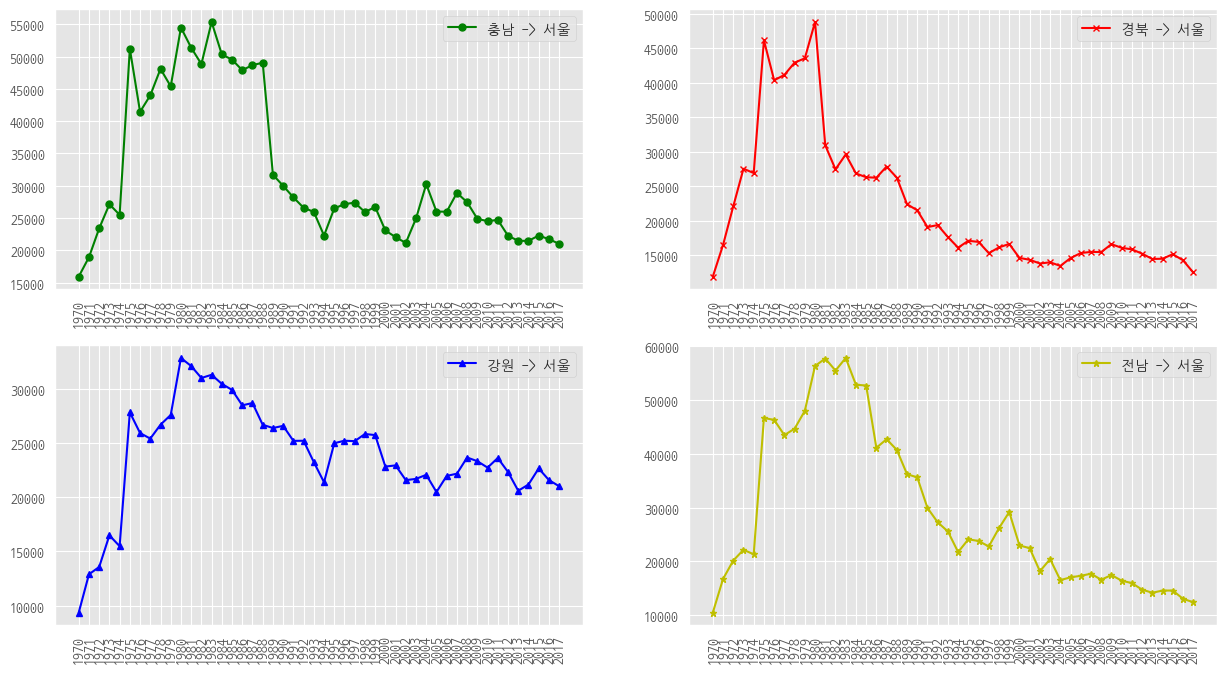

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

ax[0, 0].plot(df_seoul3.columns, df_seoul3.loc['충청남도'],
         marker = 'o', markersize = 5, color = 'g', label = '충남 -> 서울')
ax[0, 1].plot(df_seoul3.columns, df_seoul3.loc['경상북도'],
         marker = 'x', markersize = 5, color = 'r', label = '경북 -> 서울')
ax[1, 0].plot(df_seoul3.columns, df_seoul3.loc['강원도'],
         marker = '^', markersize = 5, color = 'b', label = '강원 -> 서울')
ax[1, 1].plot(df_seoul3.columns, df_seoul3.loc['전라남도'],
         marker = '*', markersize = 5, color = 'y', label = '전남 -> 서울')

ax[0, 0].set_xticks(df_seoul3.columns)
ax[0, 1].set_xticks(df_seoul3.columns)
ax[1, 0].set_xticks(df_seoul3.columns)
ax[1, 1].set_xticks(df_seoul3.columns)

ax[0, 0].set_xticklabels(df_seoul3.columns, rotation = 90)
ax[0, 1].set_xticklabels(df_seoul3.columns, rotation = 90)
ax[1, 0].set_xticklabels(df_seoul3.columns, rotation = 90)
ax[1, 1].set_xticklabels(df_seoul3.columns, rotation = 90)

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

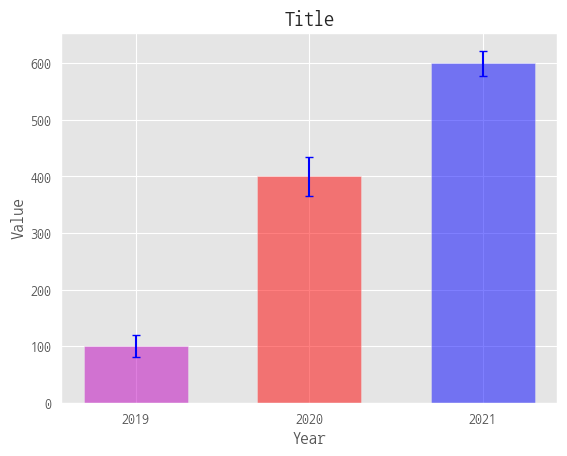

In [98]:
## 막대그래프

x = np.arange(3)
y_value = [100, 400, 600]
y_std = [20, 34, 22]
plt.bar(x, y_value, color = ['m', 'r', 'b'], alpha = 0.5,
        width= 0.6, yerr = y_std, capsize = 3, ecolor = 'b')

plt.title('Title')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(x, labels= ['2019', '2020', '2021'])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

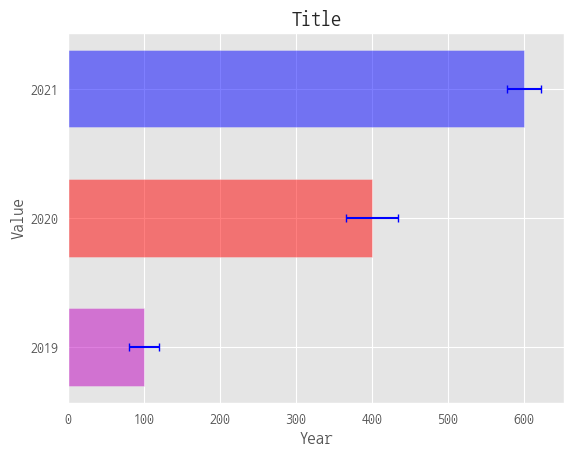

In [99]:
## 막대그래프

y = np.arange(3)
x_value = [100, 400, 600]
x_std = [20, 34, 22]
plt.barh(y, x_value, color = ['m', 'r', 'b'], alpha = 0.5,
        height= 0.6, xerr = x_std, capsize = 3, ecolor = 'b')

plt.title('Title')
plt.xlabel('Year')
plt.ylabel('Value')
plt.yticks(y, labels= ['2019', '2020', '2021'])

plt.show

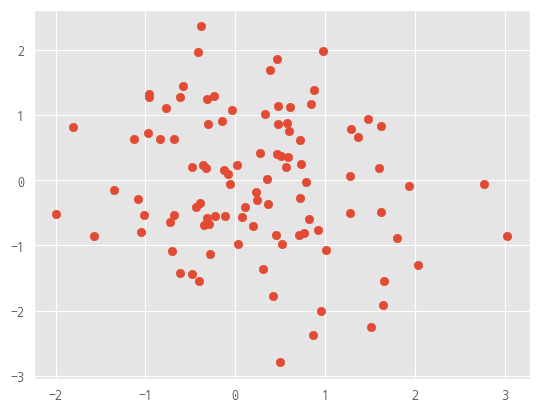

In [100]:
x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y)
plt.show()

# print(x)
# print(y)

c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


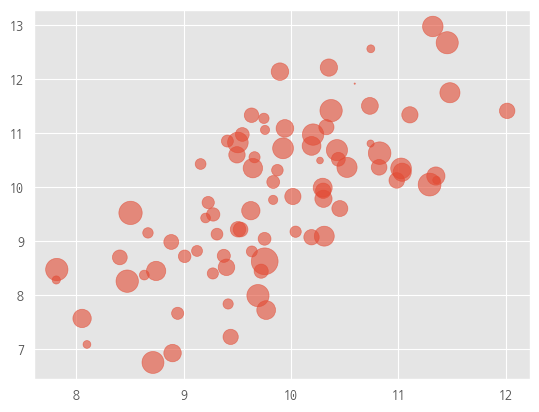

In [101]:
x = np.random.normal(10, 1, 100)
y_cor = x + np.random.randn(100)
y_size = np.random.normal(100, 100, 100) 

plt.scatter(x, y_cor, s= y_size, alpha= 0.6)
plt.show()

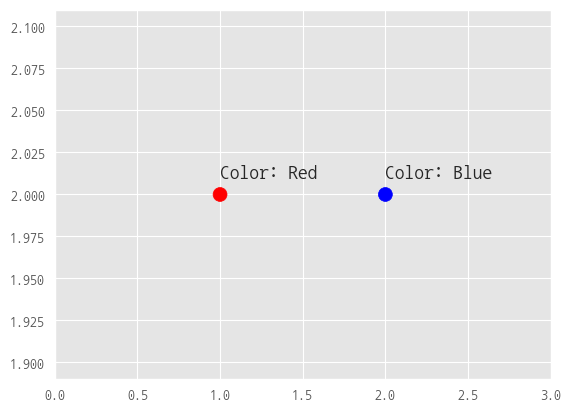

In [102]:
##
plt.scatter([1, 2], [2, 2], s= 100, c= ['r', 'b'])

plt.text(1, 2.01, 'Color: Red', size= 14)
plt.text(2, 2.01, 'Color: Blue', size= 14)
plt.xlim(0, 3)
plt.show()

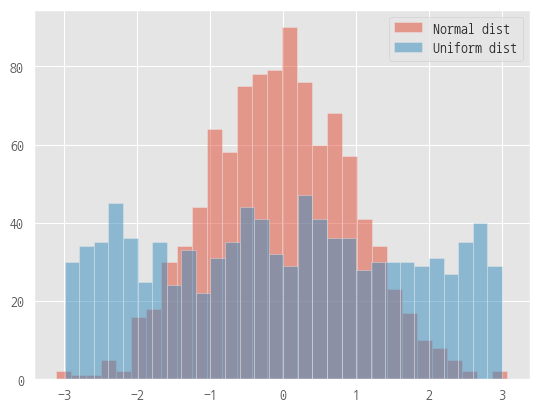

In [103]:
## 히스토그램

x = np.random.randn(1000)
y = np.random.uniform(-3, 3, 1000)

plt.hist(x, bins= 30, label= 'Normal dist', alpha = 0.5)
plt.hist(y, bins= 30, label= 'Uniform dist', alpha = 0.5)

plt.legend()
plt.show()

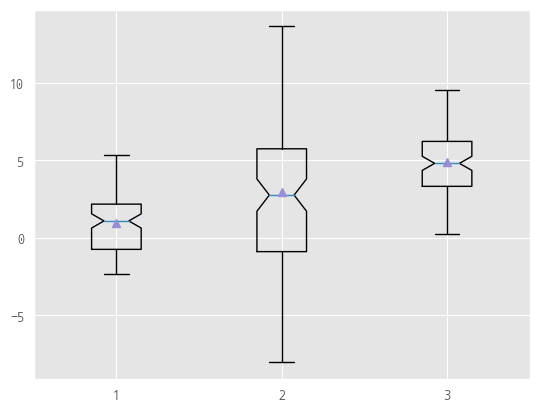

In [104]:
## boxplot

a = np.random.normal(1, 2, 100)
b = np.random.normal(3, 4, 100)
c = np.random.normal(5, 2, 100)

plt.boxplot([a, b, c], whis= 2.5, notch= True, vert= True, showmeans= True)

plt.show()


In [105]:
## seaborn

titanic = sns.load_dataset('titanic')
titanic.head()




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


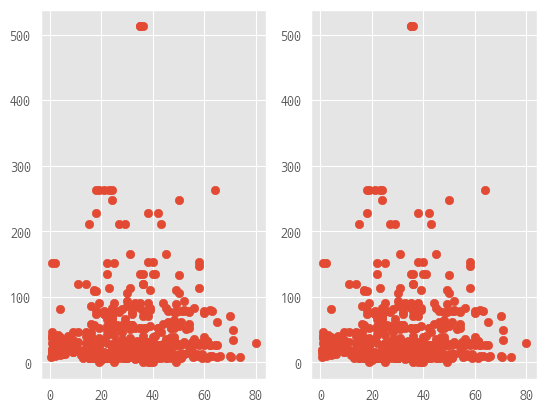

In [106]:
fig, ax = plt.subplots(1, 2)

ax[0].scatter(titanic['age'], titanic['fare'])
ax[1].scatter(titanic['age'], titanic['fare'])

plt.show()

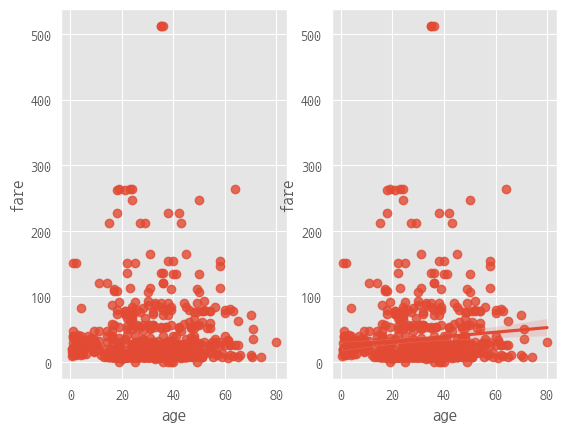

In [107]:
fig, ax = plt.subplots(1, 2)

sns.regplot(x = 'age', y = 'fare', data = titanic,
            ax = ax[0], fit_reg=False)
sns.regplot(x = 'age', y = 'fare', data = titanic,
            ax = ax[1], fit_reg=True)



plt.show()

C:\Users\jaemi\AppData\Local\Temp\ipykernel_2328\34072122.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax = ax[0])
C:\Users\jaemi\AppData\Local\Temp\ipykernel_2328\34072122.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], hist = False, ax = ax

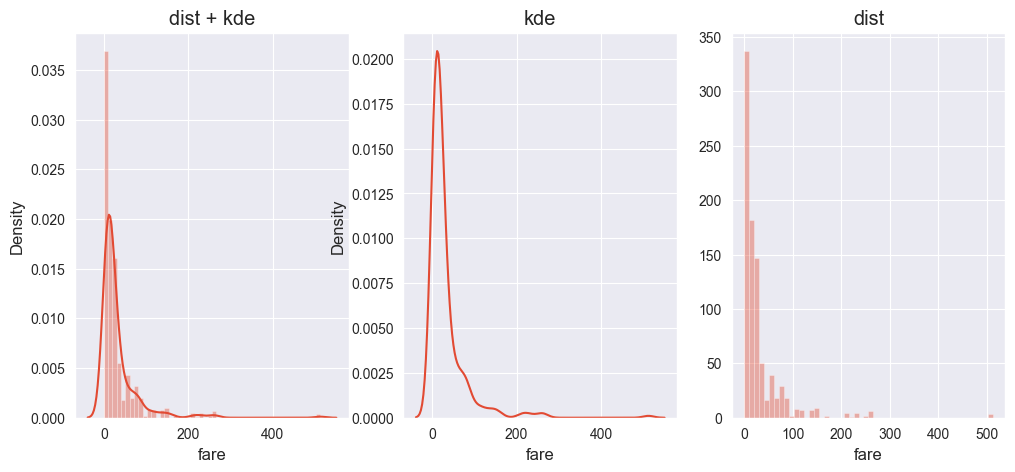

In [108]:
## distplot

sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 3, figsize = (12, 5))

sns.distplot(titanic['fare'], ax = ax[0])
sns.distplot(titanic['fare'], hist = False, ax = ax[1])
sns.distplot(titanic['fare'], kde = False, ax = ax[2])

ax[0].set_title('dist + kde')
ax[1].set_title('kde')
ax[2].set_title('dist')

plt.show()

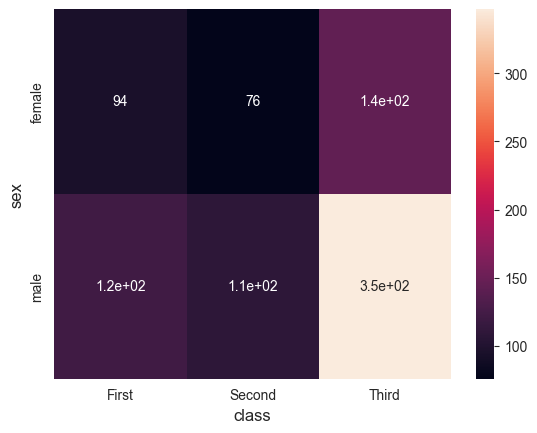

In [109]:
##  heatmap

# titanic.head()

table = titanic.pivot_table(index= ['sex'], columns= ['class'], aggfunc= 'size')
sns.heatmap(table, annot= True)

plt.show()

c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


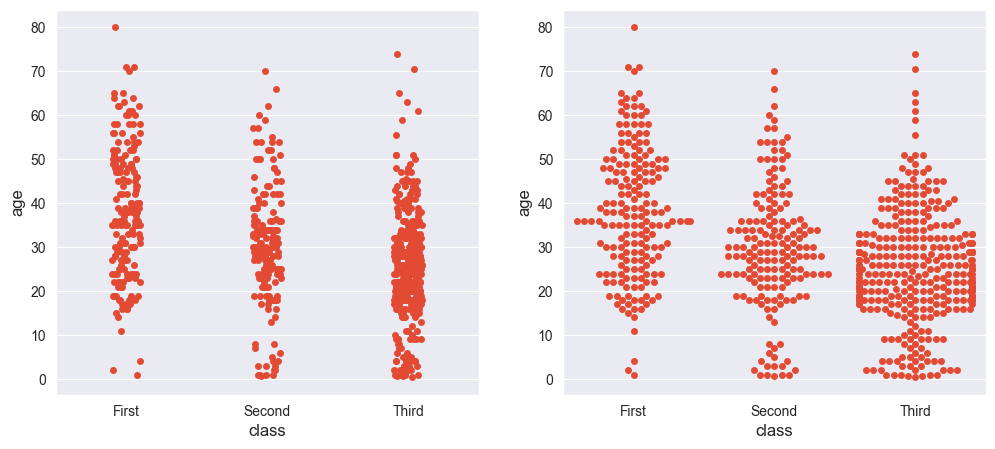

In [110]:
## strip, swarm

sns.set_style('darkgrid')

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.stripplot(x = 'class', y = 'age', data = titanic,
              ax = ax[0])
sns.swarmplot(x = 'class', y = 'age', data = titanic,
              ax = ax[1])

plt.show()

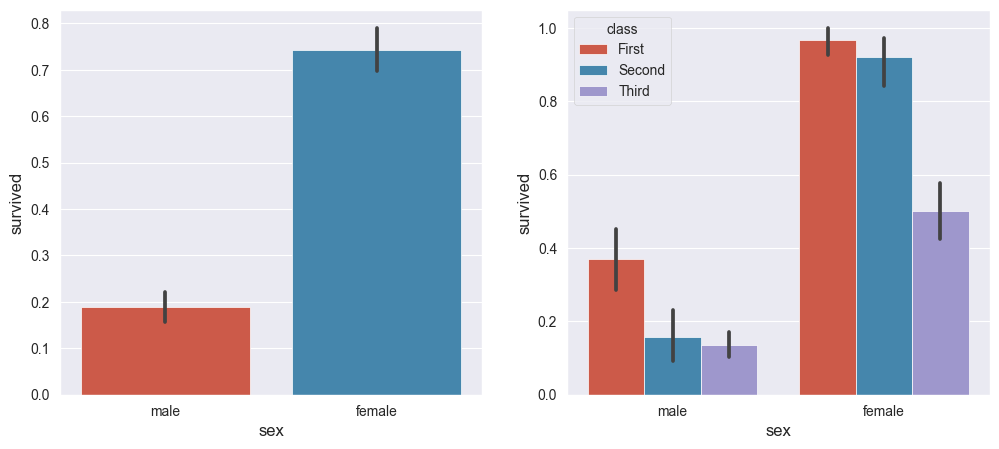

In [111]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = 'sex', y = 'survived', data = titanic,
              ax = ax[0])
sns.barplot(x = 'sex', y = 'survived', data = titanic, hue= 'class',
              ax = ax[1])

plt.show()

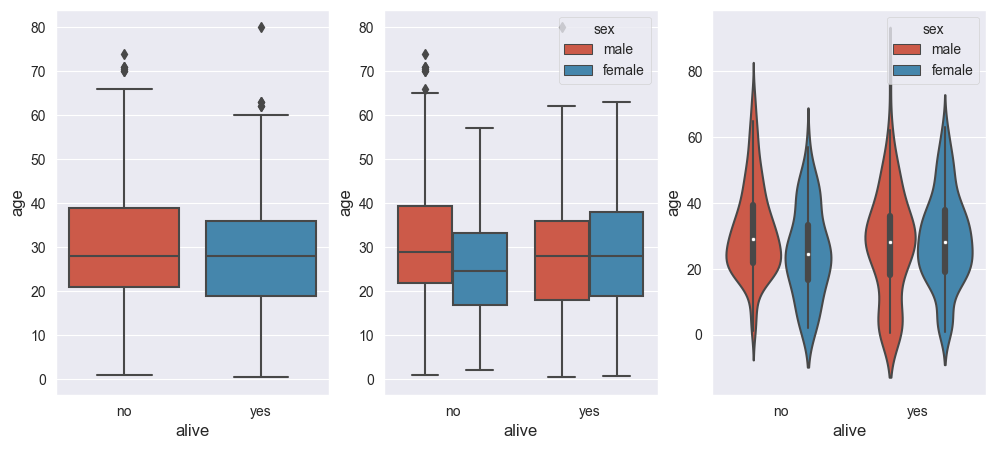

In [112]:
## 

fig, ax = plt.subplots(1, 3, figsize = (12, 5))

sns.boxplot(x= 'alive', y= 'age', data = titanic,
              ax= ax[0])
sns.boxplot(x= 'alive', y= 'age', data = titanic, hue= 'sex',
              ax= ax[1])
sns.violinplot(x= 'alive', y= 'age', data = titanic, hue= 'sex',
              ax= ax[2])

plt.show()

In [113]:
! pip install folium

In [114]:
import folium

In [115]:
seoul_map = folium.Map(location= [37.5138, 127.0295],
                       tiles = 'Stamen Terrain',
                       zoom_start = 15)

seoul_map

In [120]:
df = pd.read_excel('./05000266/part4/서울지역 대학교 위치.xlsx',
                   index_col= 0, header= 0)

seoul_map = folium.Map(location= [37.55, 126.98],
                       zoom_start = 14)

for name, lat, lng in zip(df.index, df['위도'], df['경도']):
    folium.Marker([lat, lng],
                  radius = 8,
                  color = 'brown',
                  fill = True,
                  popup = name).add_to(seoul_map)

seoul_map